In [40]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()

In [42]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [43]:
iris.target_names , iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [44]:
# Map the array to new values using the mapping function
target = np.vectorize(lambda val :  iris.target_names[val])(iris.target)


array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [45]:
df = pd.DataFrame(  iris.data , columns = iris.feature_names)
df['flower'] = target

In [73]:
df['target'] = iris.target

# Data Analysis

In [46]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
df.shape

(150, 5)

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   flower             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
print(df.flower.unique())

['setosa' 'versicolor' 'virginica']


In [48]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
flower                object
dtype: object

In [6]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [54]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

# Data Visualization

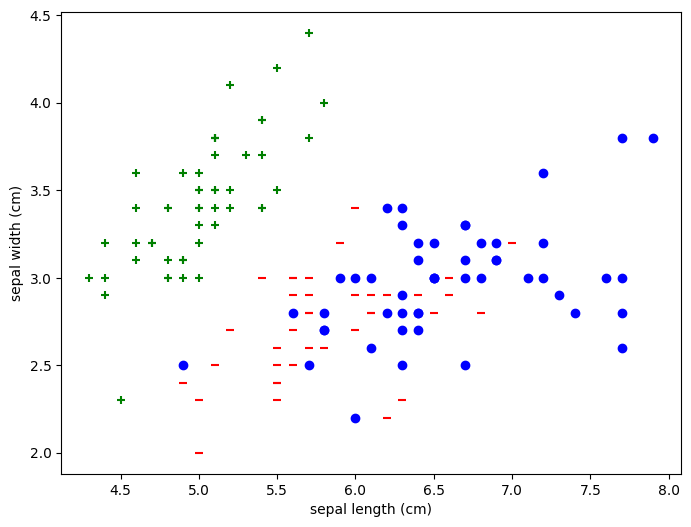

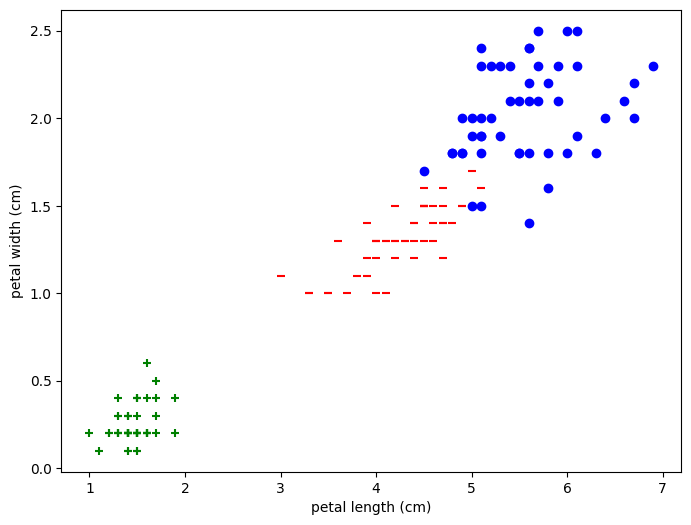

In [72]:
# Create a count plot 
def scatterPlot( x , y ):
    plt.figure(figsize=(8, 6))

    df0 = df[df.flower == 'setosa']
    df1 = df[df.flower == 'versicolor']
    df2 = df[df.flower == 'virginica']

    plt.scatter(df0[x] , df0[y] , color = 'green' , marker = '+')
    plt.scatter(df1[x] , df1[y] , color = 'red' , marker = '_')
    plt.scatter(df2[x] , df2[y] , color = 'blue' , marker = 'o')

    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

scatterPlot("sepal length (cm)"  ,"sepal width (cm)")
scatterPlot("petal length (cm)"  ,"petal width (cm)")



In [56]:
# Count the occurrences of each drug type
def piePlot(col):
    counts = df[col].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    plt.title('Distribution of '+col)
    plt.axis('equal')   
    plt.show()

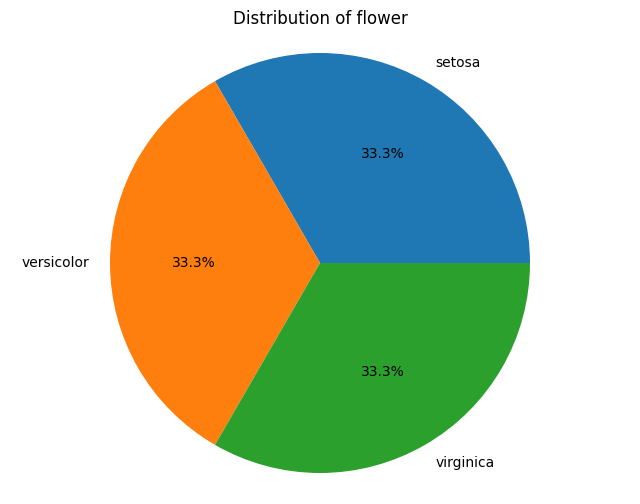

In [57]:
piePlot('flower')

# Data Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


In [19]:
def handleOrdinalEncoding(col, custom_categories):
    label_encoder = LabelEncoder()
    label_encoder.fit(custom_categories)
    encoded_data =label_encoder.fit_transform(df[col] )
    return encoded_data
    

In [15]:
def handleNominalEncoding(col):
    dummies = pd.get_dummies(df[col] , prefix=col + "_" )
    dummies_drop_one_col = dummies.columns.tolist()[0] 
    merged = pd.concat([df , dummies] , axis='columns')
    return merged.drop([col , dummies_drop_one_col] , axis = 'columns')

In [63]:
df = handleNominalEncoding("Sex")

In [55]:
for col,category in [ ["BP" , ['LOW' ,'NORMAL' , "HIGH" ]] , ["Cholesterol" , ['NORMAL' , "HIGH"]]  , [ 'Drug' , ['drugA' , 'drugB', 'drugC'  ,'drugX' , 'DrugY'] ]]:
   df[col] = handleOrdinalEncoding(col , category)

In [56]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,0,0,25.355,0
1,47,M,1,0,13.093,3
2,47,M,1,0,10.114,3
3,28,F,2,0,7.798,4
4,61,F,1,0,18.043,0


# Split data into training and testing sets

In [76]:
from sklearn.model_selection import  train_test_split


In [74]:
features = df.drop(['flower' , 'target'] , axis='columns')
target = df['target']

In [78]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.2, random_state=42)

In [79]:
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


# Classification with Decision Tree

In [80]:
from sklearn.svm import  SVC

In [81]:
svm = SVC()
svm.fit(x_train , y_train)
svm.score(x_test , y_test)

1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


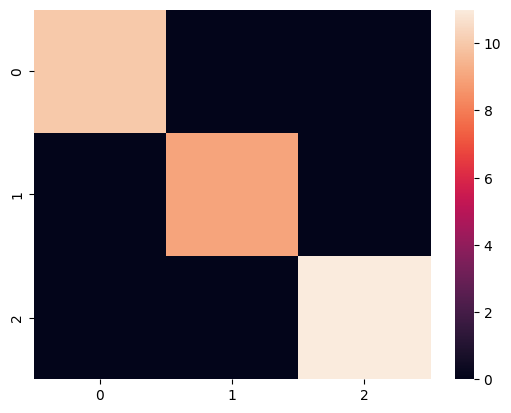

In [87]:
y_pred = svm.predict(x_test)
model_evaluation(y_pred , y_test)

# Classification with SVM Classifier

# Evaluate the Model

In [85]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [86]:
def model_evaluation(pred , actual):
    cm = confusion_matrix(actual , pred)
    print("Confusion Matrix:")
    print(cm)
    sns.heatmap(cm)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1 Score:", f1)

    # Calculate the precision score
    precision = precision_score(y_test, y_pred, average='weighted')
    print("Precision Score:", precision)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred, average='weighted')
    print("Recall Score:", recall)
